<a href="https://colab.research.google.com/github/Ashutosh-254/Resume-Parser/blob/master/Resume_Parser_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'

In [ ]:
# set palette color
plt.style.use(PLOT_PALETTE)
%matplotlib inline

In [ ]:
#df = pd.read_csv('../input/resume-dataset/Resume/Resume.csv')
df = pd.read_csv('/content/Resume.csv')

In [ ]:
df.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR

In [ ]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]


    return ' '.join(txt)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [ ]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [ ]:
df.columns
#text_df = df.drop(['label'], axis=1)

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [ ]:
text_df = df.drop(['Resume_html','ID','Category'], axis=1)

In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
dtypes: object(1)
memory usage: 19.5+ KB


In [ ]:
text_df.head()

Resume_str
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1           HR SPECIALIST, US HR OPERATIONS      ...
2           HR DIRECTOR       Summary      Over 2...
3           HR SPECIALIST       Summary    Dedica...
4           HR MANAGER         Skill Highlights  ...

In [ ]:
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    words = word_tokenize(text)
    clean_words = [word.lower() for word in words if word.lower() not in one_set_of_stopwords and word.lower() not in string.punctuation]
    return clean_words

one_set_of_stopwords = set(stopwords.words('english') + ['``', "''"])

# Load your dataset here and replace 'YourDataset.csv' with the actual filename
df = pd.read_csv('Resume.csv')

cleaned_words = []

for resume in df['Resume_str']:
    if isinstance(resume, str):
        cleaned_words.extend(preprocess_text(resume))

word_freq_dist = FreqDist(cleaned_words)
most_common = word_freq_dist.most_common(50)
print(most_common)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('state', 16073), ('company', 15075), ('city', 15059), ('management', 11995), ('name', 11739), ('sales', 8121), ('customer', 7717), ('skills', 7691), ('business', 7677), ('－', 6890), ('new', 6329), ('service', 5992), ('team', 5887), ('development', 5643), ('experience', 5611), ('training', 5557), ('project', 5259), ("'s", 5246), ('work', 4694), ('information', 4472), ('marketing', 4367), ('manager', 4289), ('financial', 4185), ('support', 4076), ('office', 4069), ('education', 4050), ('including', 4038), ('staff', 3902), ('professional', 3841), ('data', 3716), ('system', 3634), ('systems', 3505), ('university', 3447), ('customers', 3385), ('process', 3378), ('managed', 3351), ('design', 3279), ('quality', 3242), ('clients', 3209), ('developed', 3139), ('client', 3099), ('reports', 3065), ('analysis', 3014), ('operations', 2971), ('product', 2901), ('program', 2878), ('microsoft', 2815), ('services', 2787), ('accounting', 2775), ('current', 2752)]


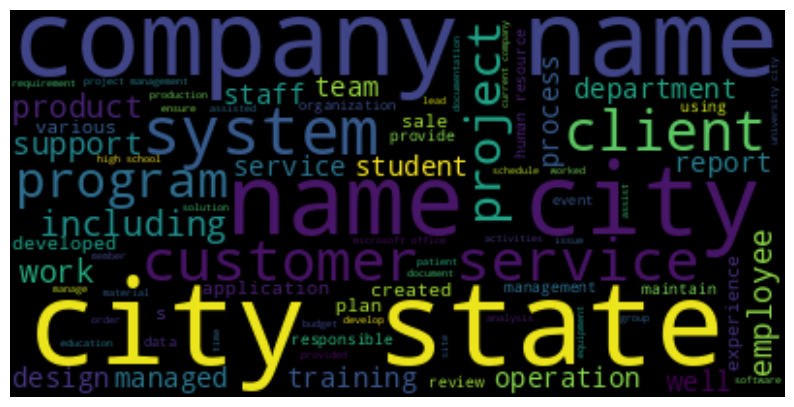

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your data preprocessing code here...

# Convert the list of cleaned words into a single string
cleaned_text = ' '.join(cleaned_words)

wc = WordCloud().generate(cleaned_text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# create list of all categories
categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [ ]:
# create new df for corpus and category
df_categories = [df[df['Category'] == category].loc[:, ['Resume_str', 'Category']] for category in categories]
df_categories

[                                             Resume_str    Category
 1808           ACCOUNTANT       Professional Summary...  ACCOUNTANT
 1809           ACCOUNTANT       Summary      Innovat...  ACCOUNTANT
 1810           ACCOUNTANT         Highlights        ...  ACCOUNTANT
 1811           ACCOUNTANT           Professional Sum...  ACCOUNTANT
 1812           ACCOUNTANT       Summary    To pursue...  ACCOUNTANT
 ...                                                 ...         ...
 1921           GENERAL ACCOUNTANT       Professional...  ACCOUNTANT
 1922           STAFF ACCOUNTANT       Professional S...  ACCOUNTANT
 1923           GENERAL ACCOUNTANT           Summary ...  ACCOUNTANT
 1924           PROJECT ACCOUNTANT           Career F...  ACCOUNTANT
 1925           SENIOR ACCOUNTANT           Summary  ...  ACCOUNTANT
 
 [118 rows x 2 columns],
                                             Resume_str  Category
 439           ADVOCATE         Professional Summary...  ADVOCATE
 440         

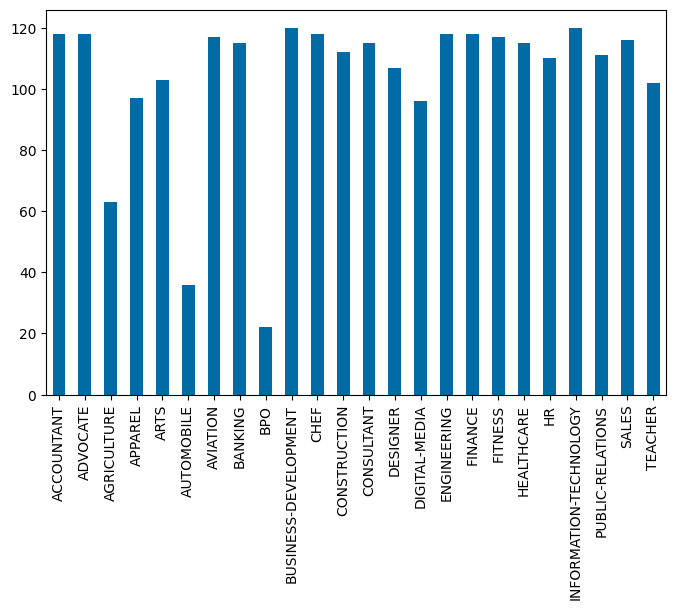

In [ ]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(8, 5))
plt.show()

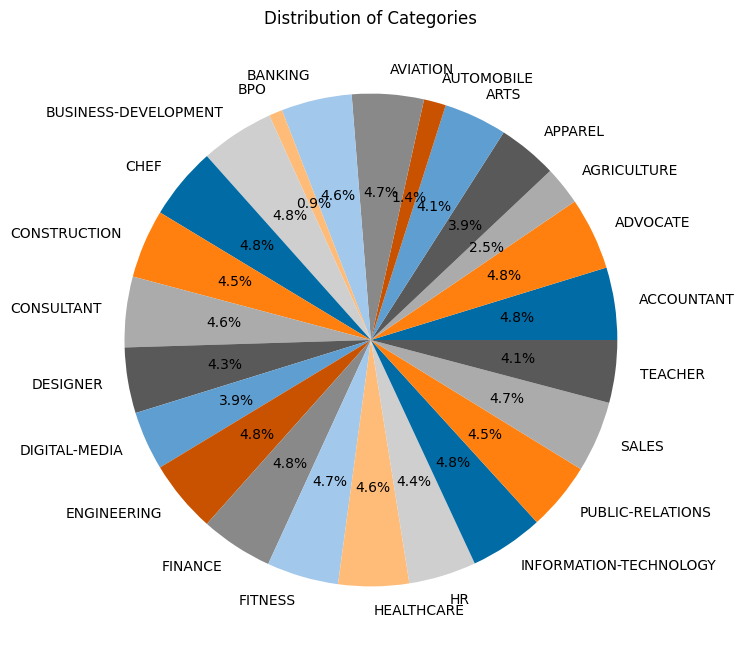

In [ ]:
# Plot the pie chart with percentage labels
plt.figure(figsize=(15, 8))
df['Category'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.ylabel('')
plt.show()

In [ ]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume_str'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

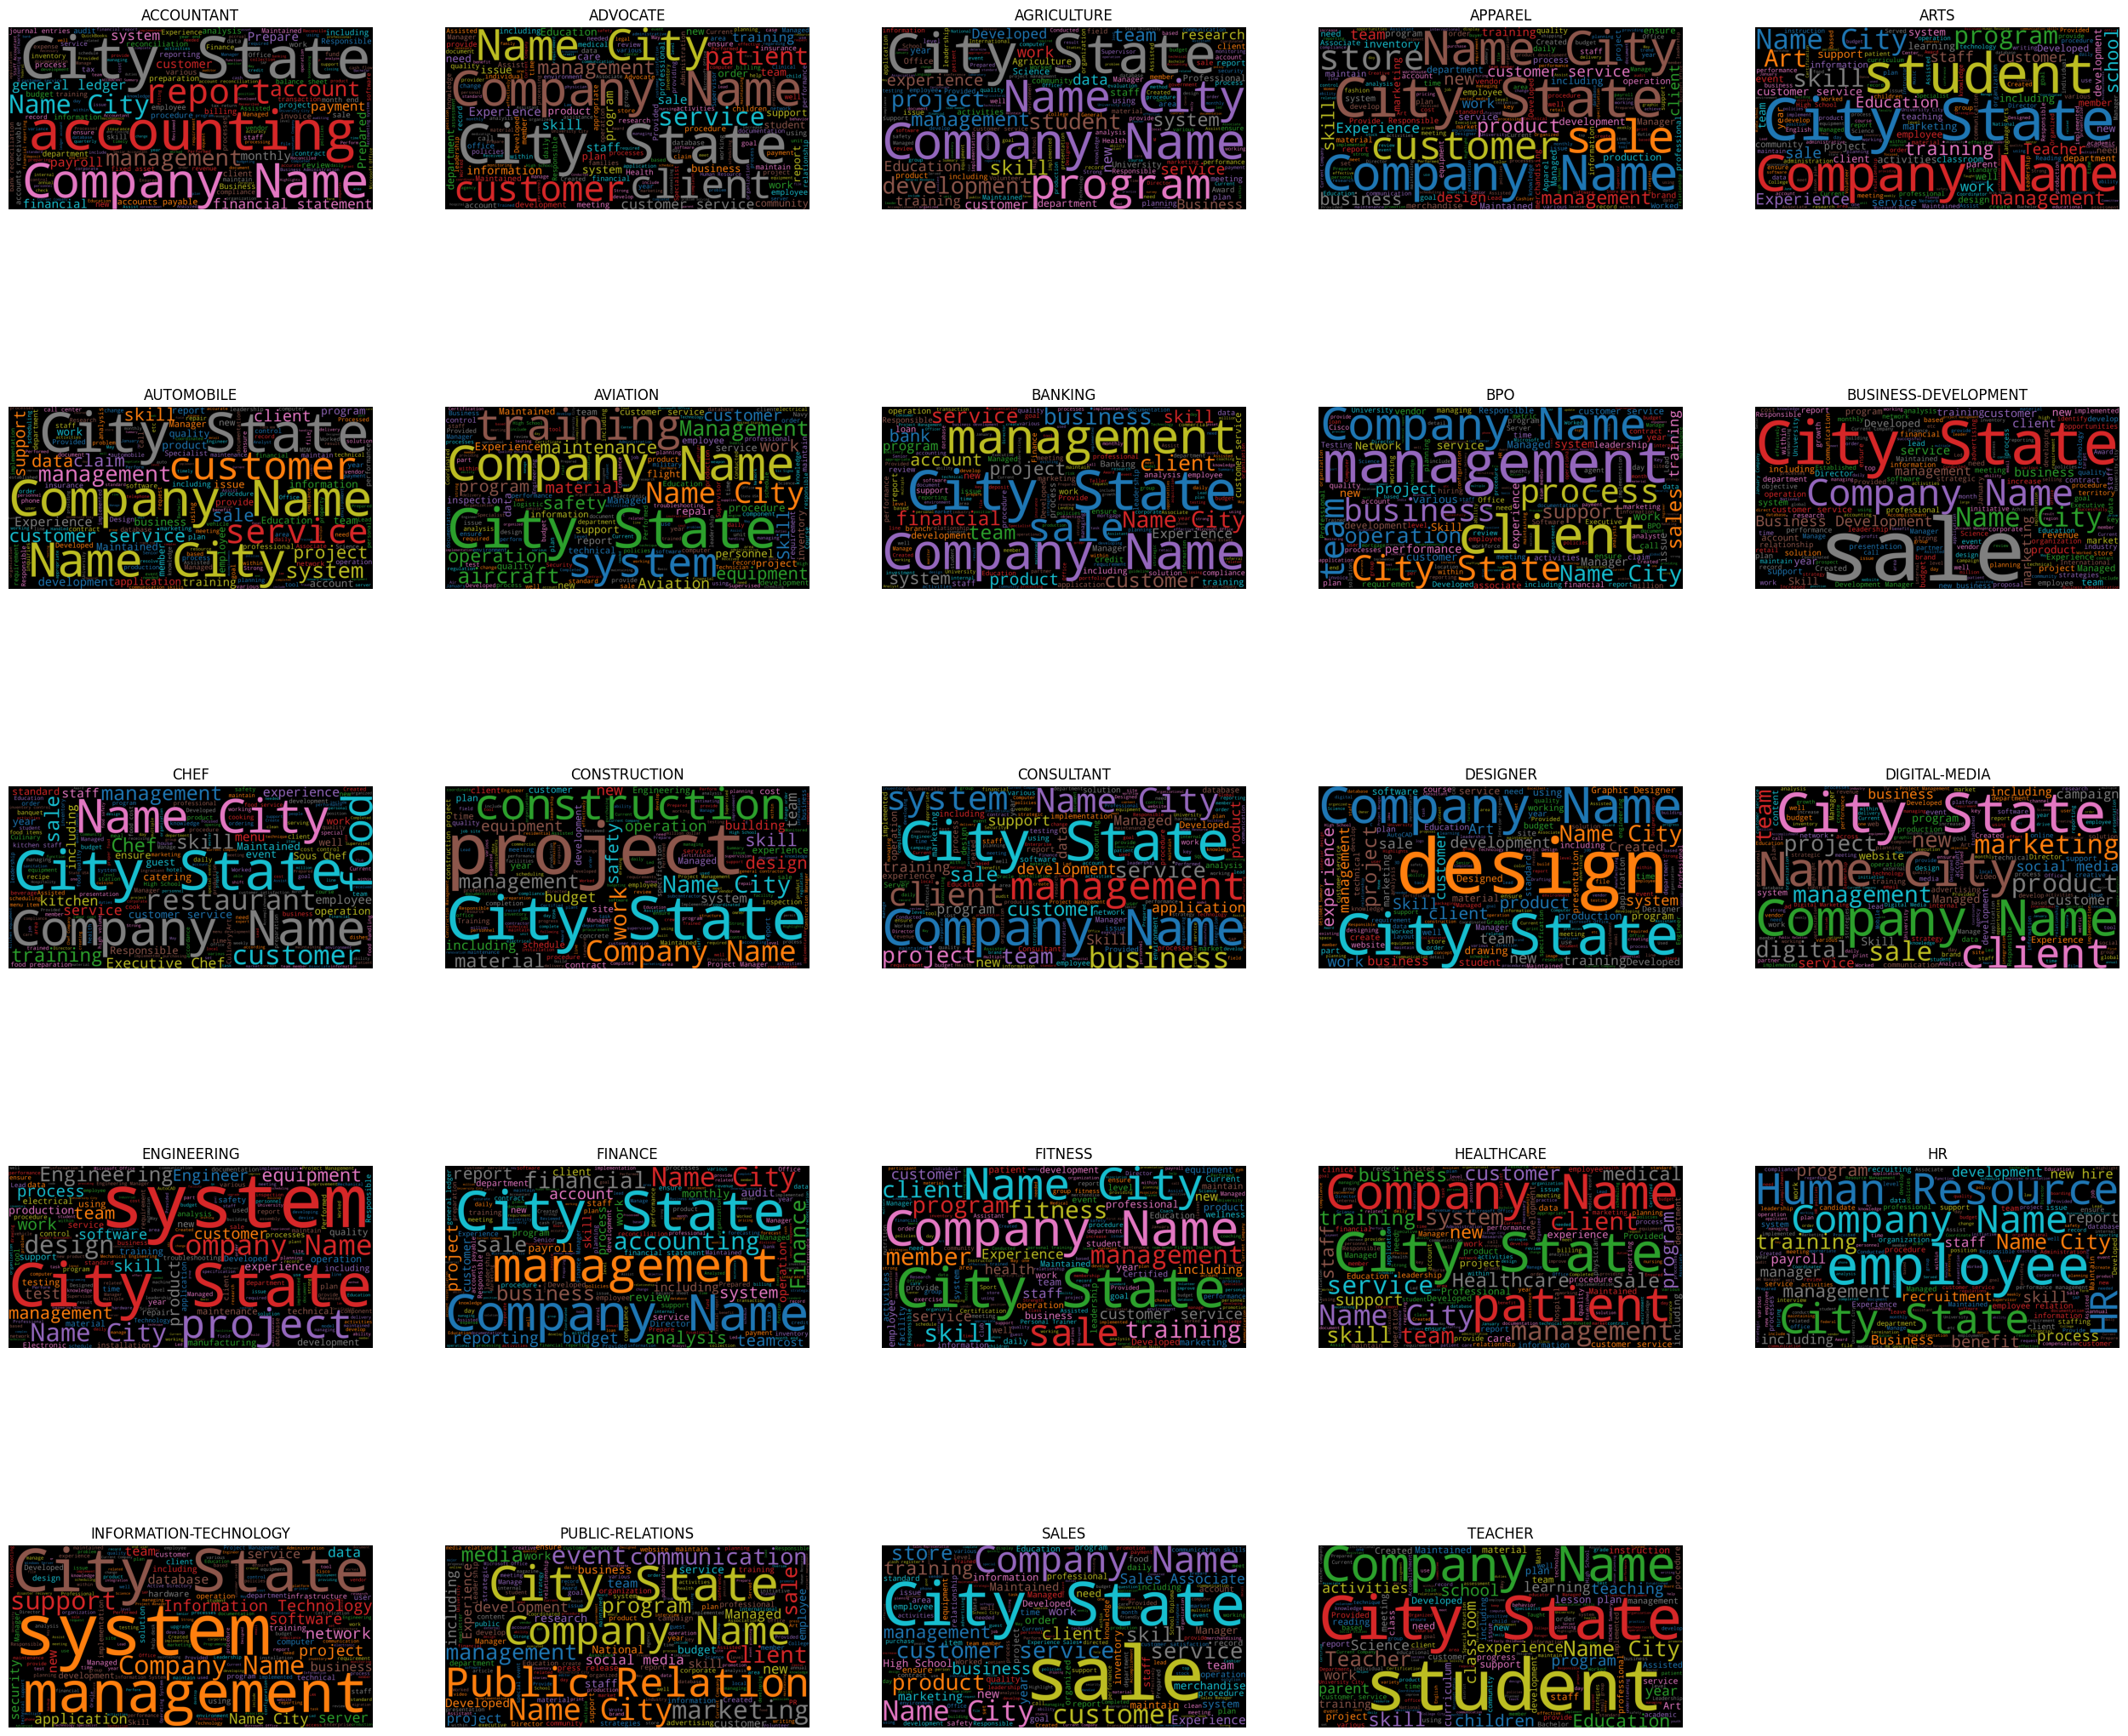

In [ ]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [ ]:
def wordfreq(df):
    count = df['Resume_str'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

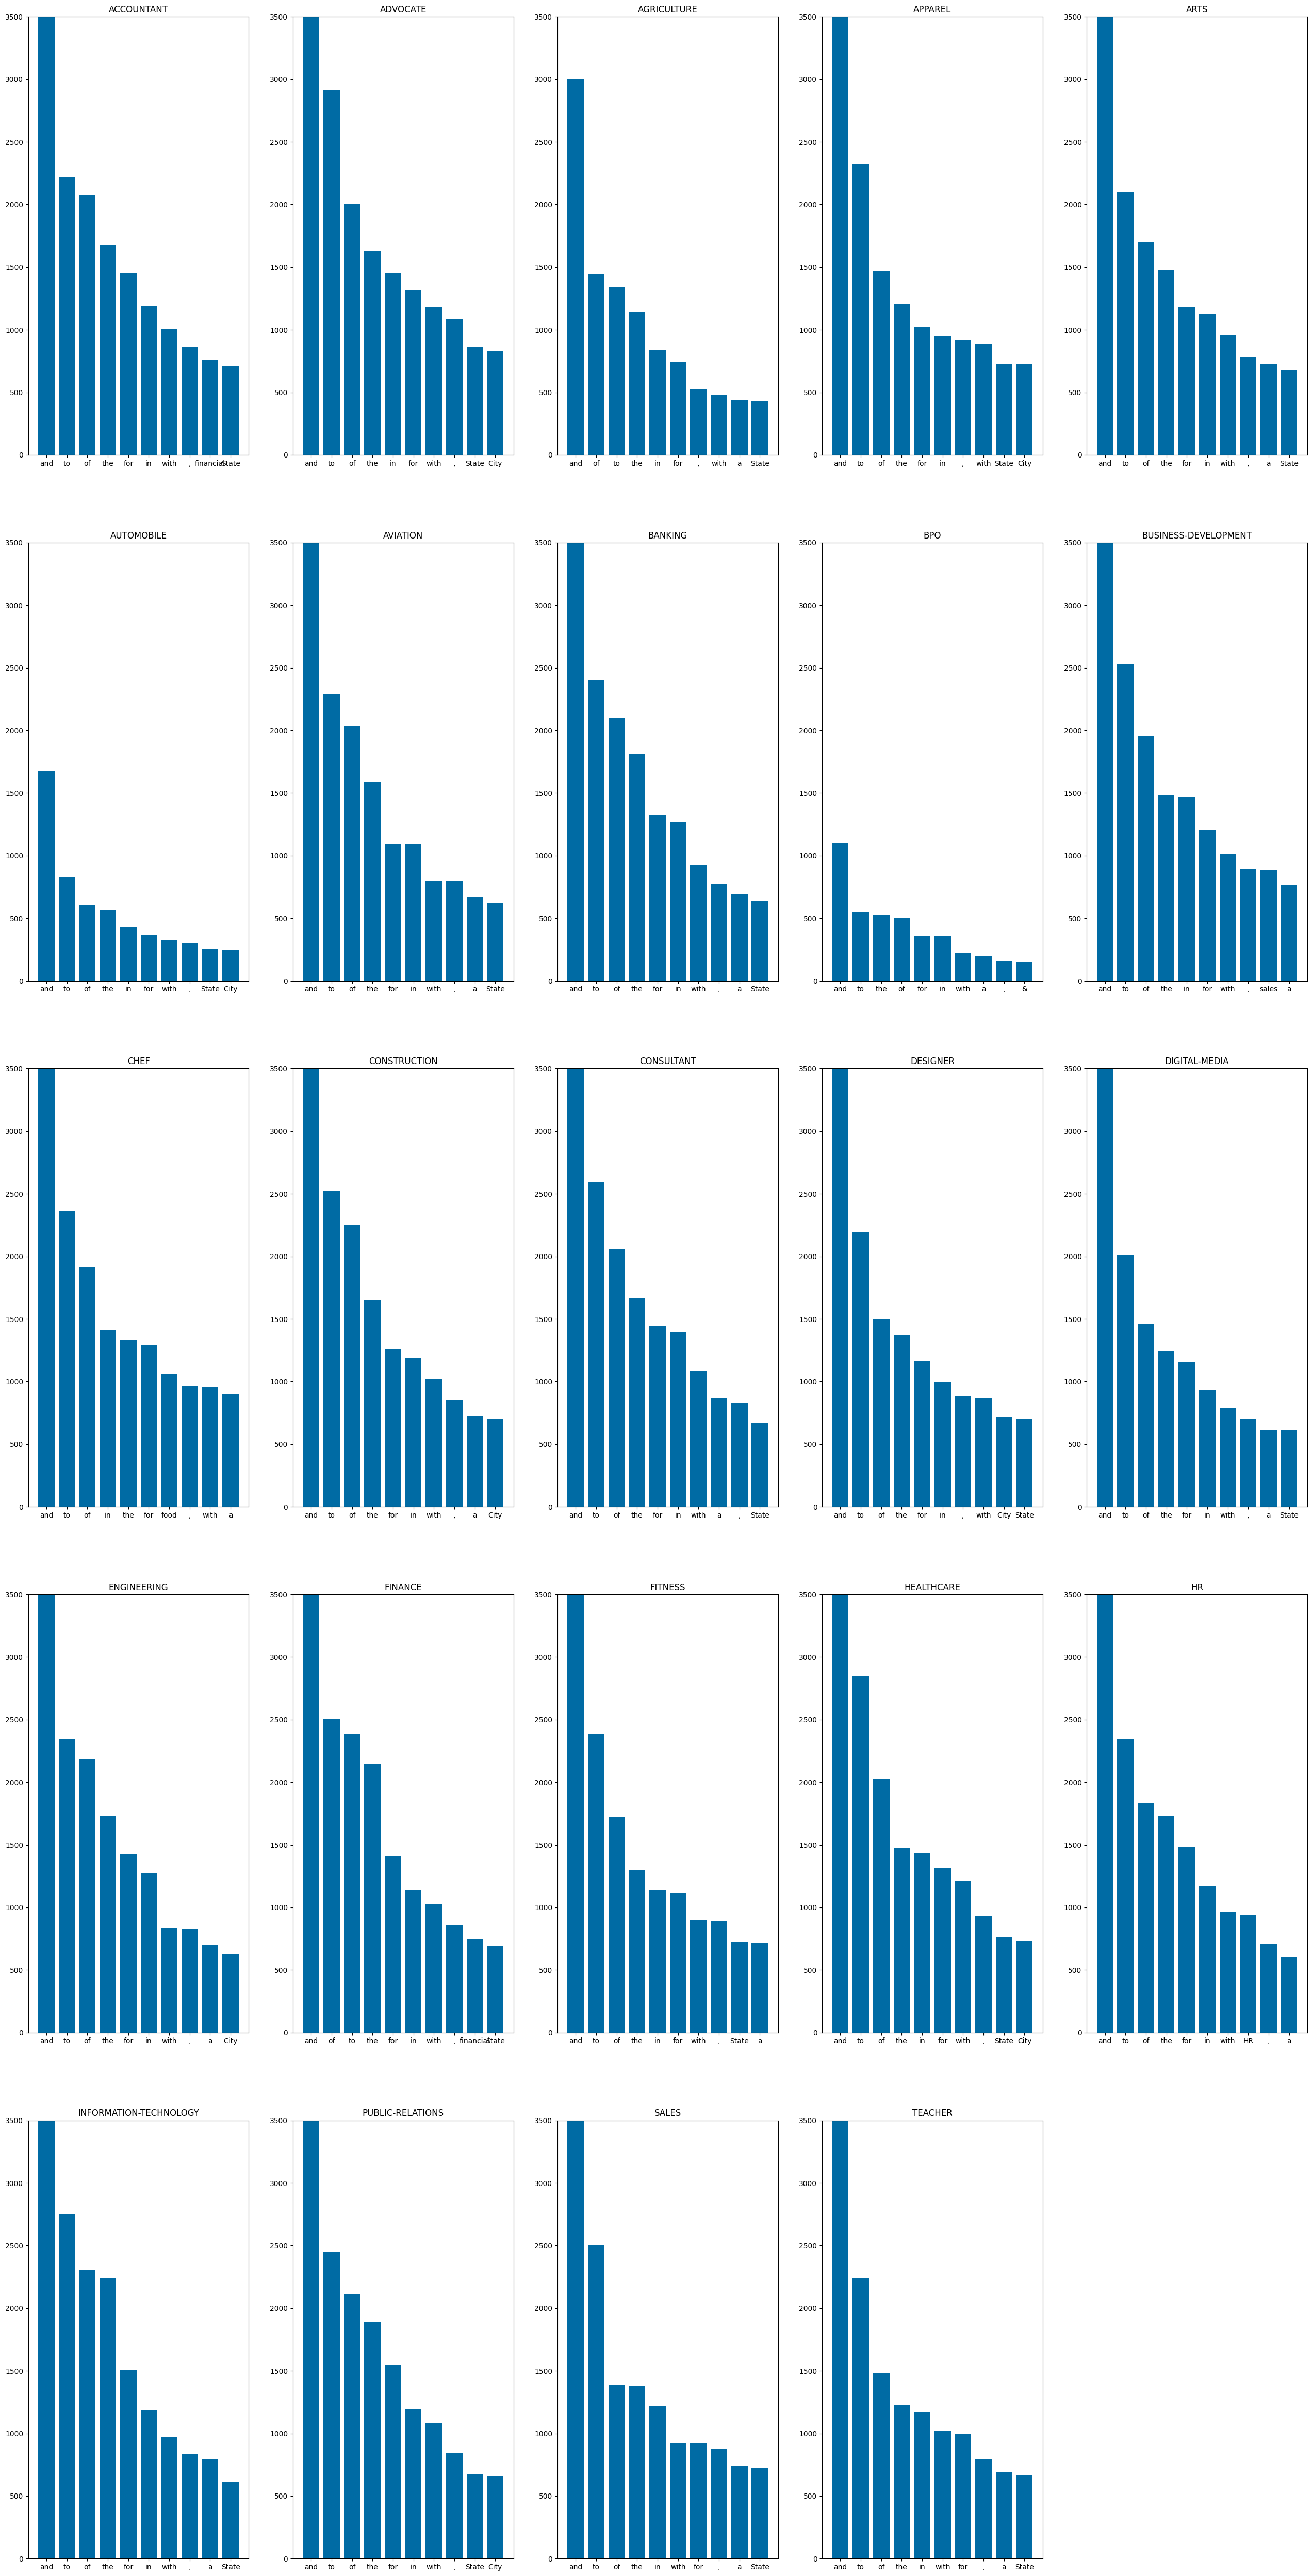

In [ ]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [ ]:
df

ID                                         Resume_str  \
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2     33176873           HR DIRECTOR       Summary      Over 2...   
3     27018550           HR SPECIALIST       Summary    Dedica...   
4     17812897           HR MANAGER         Skill Highlights  ...   
...        ...                                                ...   
2479  99416532           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...   
2480  24589765           GOVERNMENT RELATIONS, COMMUNICATIONS ...   
2481  31605080           GEEK SQUAD AGENT         Professional...   
2482  21190805           PROGRAM DIRECTOR / OFFICE MANAGER    ...   
2483  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  
0     <div class="fontsize fontface vmargins hmargin...        19  
1     <div class="fontsize fontface vmargins hmargin...        19  
2     <div class="fontsize fontface vmargins hmargin...        19  
3     <div class="fontsize fontface vmargins hmargin...        19  
4     <div class="fontsize fontface vmargins hmargin...        19  
...                                                 ...       ...  
2479  <div class="fontsize fontface vmargins hmargin...         6  
2480  <div class="fontsize fontface vmargins hmargin...         6  
2481  <div class="fontsize fontface vmargins hmargin...         6  
2482  <div class="fontsize fontface vmargins hmargin...         6  
2483  <div class="fontsize fontface vmargins hmargin...         6  

[2484 rows x 4 columns]

In [ ]:
df.Category.value_counts()

20    120
9     120
16    118
1     118
0     118
15    118
10    118
6     117
17    117
22    116
7     115
18    115
12    115
11    112
21    111
19    110
13    107
4     103
23    102
3      97
14     96
2      63
5      36
8      22
Name: Category, dtype: int64

In [ ]:
#Remove Category with a few records (implanced data)
#df = df[df.Category != 2]
#df = df[df.Category != 5]
#df = df[df.Category != 8]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['Resume_str'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


Run for 82,18; 75, 25, 70,30; 53,37
Vary the size of the data set
Add duplicated data in the same dataset
Tabulate the results

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.3,
#                                                  shuffle=True, stratify=requiredTarget)


X = np.random.randn(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, 100)  # Example labels (binary classification)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

print(X_train.shape)
print(X_test.shape)

(80, 5)
(20, 5)


In [ ]:


# Create and fit the OneVsRestClassifier with KNeighborsClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

# Make predictions
prediction = clf.predict(X_test)

# Print accuracy
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.65
Accuracy of KNeighbors Classifier on test set:     0.55


In [ ]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       0.59      0.83      0.69        12

    accuracy                           0.55        20
   macro avg       0.46      0.48      0.44        20
weighted avg       0.49      0.55      0.49        20




In [ ]:
def preprocess(text):
    # Implement your text preprocessing steps here
    # For example, you could convert text to lowercase, remove punctuation, etc.
    processed_text = text.lower()  # Convert to lowercase
    return processed_text

# Load the CSV file
df = pd.read_csv('/content/Resume.csv')

# Apply the preprocess function to the 'Resume_str' column
df['Resume_str'] = df['Resume_str'].apply(lambda w: preprocess(w))

In [ ]:
from sklearn.utils import shuffle

features = df['Resume_str'].values
original_labels = df['Category'].values
labels = original_labels[:]

for i in range(len(df)):

    labels[i] = str(labels[i].lower())  # convert to lowercase
    labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0])
print(labels[0])

         lead teacher       summary    to secure a position where i can utilize my skills, work ethic, achievement where we it can be an asset to
your company.      highlights        knowledge of windows microsoft word, powerpoint & excel and internet explorer hair stylist and makeup
stylist.            experience      lead teacher   12/2015   to   06/2016     company name   city  ,   state        promoted good behaviors by using the positive reinforcement method.      maintained daily records of children's individual activities, behaviors, meals and naps.         assigned to work with academic education director to provide and maintain a positive and appropriate educational program that meets the social, emotional, physical, and intellectual needs of the children within my care.   established a safe play environment for the children.    accomplishments during my time at this job i have learned to understand children at different age group, and how they function as their brain develope

In [ ]:
train_split = 0.8
train_size = int(train_split * len(df))

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

1987
497


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize feature data
vocab_size = 6000
oov_tok = '<>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<>': 1, 'and': 2, 'to': 3, 'of': 4, 'the': 5, 'in': 6, 'for': 7, 'with': 8, 'a': 9, 'state': 10, 'city': 11, 'company': 12, 'management': 13, 'name': 14, 'on': 15, 'as': 16, 'all': 17, 'sales': 18, 'business': 19, 'customer': 20, 'skills': 21, '－': 22, 'by': 23, 'new': 24, 'service': 25, 'team': 26, 'development': 27, 'training': 28, 'experience': 29, 'project': 30, 'work': 31, 'i': 32, 'manager': 33, 'information': 34, 'marketing': 35, 'or': 36, 'that': 37, 'financial': 38, 'office': 39, 'support': 40, 'education': 41, 'including': 42, 'from': 43, 'staff': 44, 'at': 45, 'professional': 46, 'data': 47, 'system': 48, 'systems': 49, 'university': 50, 'process': 51, 'managed': 52, 'design': 53, 'quality': 54, 'developed': 55, 'customers': 56, 'an': 57, 'clients': 58, '\xa0': 59, 'client': 60, 'reports': 61, 'analysis': 62, 'operations': 63, 'product': 64, 'high': 65, 'program': 66, 'other': 67, 'services': 68, 'accounting': 69, 'microsoft': 70, '01': 71, '2014': 72, 'current': 73, 'acco

In [ ]:
# Tokenize label data
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

{'business': 1, 'development': 2, 'information': 3, 'technology': 4, 'engineering': 5, 'advocate': 6, 'accountant': 7, 'finance': 8, 'chef': 9, 'aviation': 10, 'fitness': 11, 'sales': 12, 'consultant': 13, 'banking': 14, 'healthcare': 15, 'construction': 16, 'public': 17, 'relations': 18, 'hr': 19, 'designer': 20, 'arts': 21, 'teacher': 22, 'apparel': 23, 'digital': 24, 'media': 25, 'agriculture': 26, 'automobile': 27, 'bpo': 28}


In [ ]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(train_feature_padded[0])
print(test_feature_padded[0])

[ 203  329  118    3 1515    9  368  831   32  771 1123   92   21   31
 1551 1028  831 1065  156  771  269   57 1032    3  987   12  285  105
    4  268   70  229  397  140    2  724 3124 2880 4381    2 3867 4381
   29  203  329  230   96    3  272  197   12   14   11   10  751  792
 2014   23  106    5  384 3470 2147   75   91  202    4 1602  465  108
 2014 1557    2 5861  412    3   31    8  619   41  177    3  138    2
  129    9  384    2  259  702   66   37 2684    5  194 1799  741    2
 3961   93    4    5  516  161   92  163  327    9  708 1849  220    7
    5  516  265  274   92   81   45  303  251   32  258 1777    3 1213
  516   45  554 1958  267    2  790  674 1697   16  110    1   55    2
 2106    8  110 2483 4325   25  272   96    3  230   96   12   14   11
   10 2038 4731    2  795  315 1489 4731   34  276    5  170 2020 5603
    2 1442 5603 2544 3398 5604    2 2157    7   57 1097    4  697 4731
  358 1194  795    6 4731    7 1194    1 4580  292    2   19  604 4731
    3 

In [ ]:
# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 64)             384000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 26)                1690      
                                                                 
Total params: 459994 (1.75 MB)
Trainable params: 459994 (1.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Example data
train_feature_padded = np.random.random((100, 50, 100))  # Replace with your actual training feature data
train_label_sequences = np.random.randint(2, size=(100,))  # Replace with your actual training labels
test_feature_padded = np.random.random((30, 50, 100))  # Replace with your actual testing feature data
test_label_sequences = np.random.randint(2, size=(30,))  # Replace with your actual testing labels

# One-hot encode your label sequences
num_classes = 2  # Number of classes
train_label_sequences = to_categorical(train_label_sequences, num_classes)
test_label_sequences = to_categorical(test_label_sequences, num_classes)

# Define the input sequence length and feature dimension
input_sequence_length = train_feature_padded.shape[1]
input_feature_dim = train_feature_padded.shape[2]

# Define your model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_sequence_length, input_feature_dim)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 12
batch_size = 32

history = model.fit(
    train_feature_padded, train_label_sequences,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(test_feature_padded, test_label_sequences),
    verbose=2
)

Epoch 1/12
4/4 - 1s - loss: 2.1833 - accuracy: 0.5400 - val_loss: 1.9184 - val_accuracy: 0.5333 - 875ms/epoch - 219ms/step
Epoch 2/12
4/4 - 0s - loss: 1.2778 - accuracy: 0.5600 - val_loss: 1.6759 - val_accuracy: 0.4667 - 95ms/epoch - 24ms/step
Epoch 3/12
4/4 - 0s - loss: 1.2453 - accuracy: 0.5100 - val_loss: 1.6530 - val_accuracy: 0.5333 - 88ms/epoch - 22ms/step
Epoch 4/12
4/4 - 0s - loss: 1.1064 - accuracy: 0.6100 - val_loss: 0.9707 - val_accuracy: 0.4667 - 77ms/epoch - 19ms/step
Epoch 5/12
4/4 - 0s - loss: 1.0642 - accuracy: 0.5300 - val_loss: 0.8341 - val_accuracy: 0.5333 - 92ms/epoch - 23ms/step
Epoch 6/12
4/4 - 0s - loss: 0.7604 - accuracy: 0.6200 - val_loss: 0.6883 - val_accuracy: 0.4667 - 97ms/epoch - 24ms/step
Epoch 7/12
4/4 - 0s - loss: 0.9678 - accuracy: 0.5200 - val_loss: 0.7552 - val_accuracy: 0.5333 - 72ms/epoch - 18ms/step
Epoch 8/12
4/4 - 0s - loss: 0.6221 - accuracy: 0.6900 - val_loss: 0.6933 - val_accuracy: 0.5333 - 74ms/epoch - 18ms/step
Epoch 9/12
4/4 - 0s - loss: 0.

In [ ]:
score = model.evaluate(test_feature_padded, test_label_sequences, verbose=1)

1/1 [==============================] - 0s 32ms/step - loss: 0.6866 - accuracy: 0.5333


In [ ]:
print("Test Accuracy:", score[1])

Test Accuracy: 0.5333333611488342


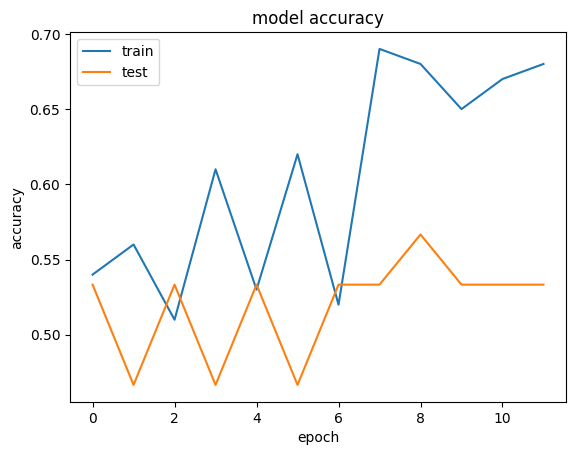

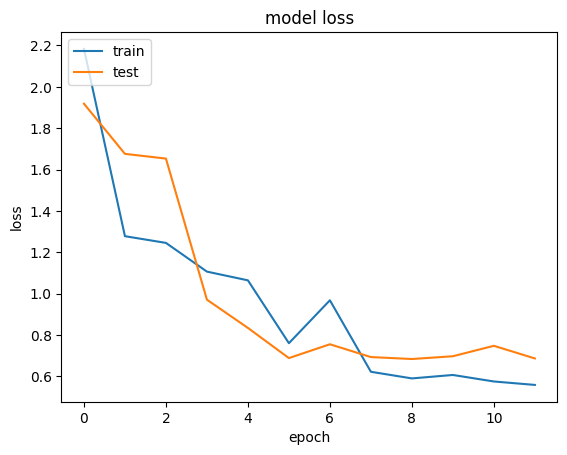

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
!pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32621 sha256=3cc79d5921d3d5c05b0c3fec6ad38defcfd681ef1e858ae9eab699f8f9edf72d
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [ ]:
from tika import parser

In [ ]:
file = r'/content/10100240.pdf'
file_data = parser.from_file(file)

2023-09-10 17:14:05,960 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2023-09-10 17:14:06,152 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2023-09-10 17:14:06,327 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [ ]:
text = file_data['content']
print(text)

































CARPENTER APPRENTICE
Professional Summary

Former construction and carpentry worker committed to high-quality workmanship and safe environments. Over 4 years of hands-on experience
working with remodeling projects in residential and commercial construction. Dedicated work ethic and exceptional attendance record. I am
motivated to learn new trades and skills. Interested in growing career and fostering leadership capabilities. Professional Construction Laborer with
excellent interpersonal skills. Works in timely and efficient manner to see tough jobs through to completion.

Skills
Cabinetry
Material prepping
Construction drawing interpretation
Carpentry techniques
Oral and written communication

Materials handling
New construction and renovation
Drywalling
Safety and compliance

Work History
Carpenter Apprentice , 10/2017 to 09/2019 
Company Name â€“ City , State 

Assisted with movement of materials and equipment to job sites
Worked with master carpenters

In [ ]:
parsed_content = {}

In [ ]:
#E-MAIL
import re
def get_email_addresses(string):
    r = re.compile(r'[\w\.-]+@[\w\.-]+')
    return r.findall(string)

email = get_email_addresses(text)
print(email)
parsed_content['E-mail'] = email

[]


In [ ]:
[]
#PHONE NUMBER
import re
def get_phone_numbers(string):
    r = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
    phone_numbers = r.findall(string)
    return [re.sub(r'\D', '', num) for num in phone_numbers]

phone_number= get_phone_numbers(text)
if len(phone_number) <= 10:
    print(phone_number)
    parsed_content['Phone number'] = phone_number

[]


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

def extract_name(text):
   nlp_text = nlp(text)

   # First name and Last name are always Proper Nouns
   pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]

   matcher.add('NAME', [pattern], on_match = None)

   matches = matcher(nlp_text)

   for match_id, start, end in matches:
       span = nlp_text[start:end]
       return span.text

name = extract_name(text)
print(name)
parsed_content['Name'] =  name

CARPENTER APPRENTICE


In [ ]:
Keywords = ["education",
            "summary",
            "accomplishments",
            "executive profile",
            "professional profile",
            "personal profile",
            "work background",
            "academic profile",
            "other activities",
            "qualifications",
            "experience",
            "interests",
            "skills",
            "achievements",
            "publications",
            "publication",
            "certifications",
            "workshops",
            "projects",
            "internships",
            "trainings",
            "hobbies",
            "overview",
            "objective",
            "position of responsibility",
            "jobs"
           ]

In [ ]:
text = text.replace("\n"," ")
text = text.replace("[^a-zA-Z0-9]", " ");
re.sub('\W+','', text)
text = text.lower()
print(text)

                                carpenter apprentice professional summary  former construction and carpentry worker committed to high-quality workmanship and safe environments. over 4 years of hands-on experience working with remodeling projects in residential and commercial construction. dedicated work ethic and exceptional attendance record. i am motivated to learn new trades and skills. interested in growing career and fostering leadership capabilities. professional construction laborer with excellent interpersonal skills. works in timely and efficient manner to see tough jobs through to completion.  skills cabinetry material prepping construction drawing interpretation carpentry techniques oral and written communication  materials handling new construction and renovation drywalling safety and compliance  work history carpenter apprentice , 10/2017 to 09/2019  company name â€“ city , state   assisted with movement of materials and equipment to job sites worked with master carpenters

In [ ]:
content = {}
indices = []
keys = []
for key in Keywords:
    try:
        content[key] = text[text.index(key) + len(key):]
        indices.append(text.index(key))
        keys.append(key)
    except:
        pass

In [ ]:
#Sorting the indices
zipped_lists = zip(indices, keys)
sorted_pairs = sorted(zipped_lists)
sorted_pairs

tuples = zip(*sorted_pairs)
indices, keys = [ list(tuple) for tuple in  tuples]
keys

['summary',
 'experience',
 'projects',
 'skills',
 'jobs',
 'objective',
 'education']

In [ ]:
#Keeping the required content and removing the redundant part
content = []
for idx in range(len(indices)):
    if idx != len(indices)-1:
        content.append(text[indices[idx]: indices[idx+1]])
    else:
        content.append(text[indices[idx]: ])

In [ ]:
for i in range(len(indices)):
    parsed_content[keys[i]] = content[i]

In [ ]:
parsed_content

{'E-mail': [],
 'Phone number': [],
 'Name': 'CARPENTER APPRENTICE',
 'summary': 'summary  former construction and carpentry worker committed to high-quality workmanship and safe environments. over 4 years of hands-on ',
 'experience': 'experience working with remodeling ',
 'projects': 'projects in residential and commercial construction. dedicated work ethic and exceptional attendance record. i am motivated to learn new trades and ',
 'skills': 'skills. interested in growing career and fostering leadership capabilities. professional construction laborer with excellent interpersonal skills. works in timely and efficient manner to see tough ',
 'jobs': 'jobs through to completion.  skills cabinetry material prepping construction drawing interpretation carpentry techniques oral and written communication  materials handling new construction and renovation drywalling safety and compliance  work history carpenter apprentice , 10/2017 to 09/2019  company name â€“ city , state   assisted wit

In [ ]:
pd.DataFrame(parsed_content.items())

0                                                  1
0        E-mail                                                 []
1  Phone number                                                 []
2          Name                               CARPENTER APPRENTICE
3       summary  summary  former construction and carpentry wor...
4    experience                experience working with remodeling 
5      projects  projects in residential and commercial constru...
6        skills  skills. interested in growing career and foste...
7          jobs  jobs through to completion.  skills cabinetry ...
8     objective  objectives gathered and disposed of work site ...
9     education  education high school diploma : 04/2010  buffa...

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Create and fit the OneVsRestClassifier with Support Vector Machines
clf = OneVsRestClassifier(SVC(kernel='linear'))  # You can choose different kernels like 'linear', 'rbf', etc.
clf.fit(X_train, y_train)

# Make predictions
prediction = clf.predict(X_test)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, clf.predict(X_train))
accuracy_test = accuracy_score(y_test, prediction)

# Print accuracy
print('Accuracy of SVM Classifier on training set: {:.2f}'.format(accuracy_train))
print('Accuracy of SVM Classifier on test set:     {:.2f}'.format(accuracy_test))

Accuracy of SVM Classifier on training set: 0.55
Accuracy of SVM Classifier on test set:     0.60


In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Create and fit the OneVsRestClassifier with RandomForestClassifier
clf = OneVsRestClassifier(RandomForestClassifier())
clf.fit(X_train, y_train)

# Make predictions
prediction = clf.predict(X_test)

# Print accuracy
print('Accuracy of RandomForest Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RandomForest Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of RandomForest Classifier on training set: 1.00
Accuracy of RandomForest Classifier on test set:     0.55


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming you have your data (X_train, y_train, X_test, y_test) ready

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Convert the confusion matrix to a DataFrame
cm_df = pd.DataFrame(cm_rf, index=["Actual Class 0", "Actual Class 1"],
                     columns=["Predicted Class 0", "Predicted Class 1"])

print("Confusion Matrix for Random Forest:")
print(cm_df)

Confusion Matrix for Random Forest:
                Predicted Class 0  Predicted Class 1
Actual Class 0                  3                  5
Actual Class 1                  4                  8


In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Create and fit the OneVsRestClassifier with DecisionTreeClassifier
clf = OneVsRestClassifier(DecisionTreeClassifier())
clf.fit(X_train, y_train)

# Make predictions
prediction = clf.predict(X_test)

# Print accuracy
print('Accuracy of DecisionTree Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of DecisionTree Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of DecisionTree Classifier on training set: 1.00
Accuracy of DecisionTree Classifier on test set:     0.45


In [ ]:
#Linear Regression

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Create and fit the OneVsRestClassifier with LogisticRegression
clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))  # Adjust max_iter as needed
clf.fit(X_train, y_train)

# Make predictions
prediction = clf.predict(X_test)

# Print accuracy
print('Accuracy of LogisticRegression Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of LogisticRegression Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of LogisticRegression Classifier on training set: 0.54
Accuracy of LogisticRegression Classifier on test set:     0.60


In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions
predictions = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as a performance metric
mse = mean_squared_error(y_test, predictions)

# Print the Mean Squared Error
print('Mean Squared Error: {:.2f}'.format(mse))
# Print accuracy
print('Accuracy of Linear Regression on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Linear Regression on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Mean Squared Error: 0.23
Accuracy of Linear Regression on training set: 0.54
Accuracy of Linear Regression on test set:     0.60


In [ ]:
import pickle

# Assume 'model' is your trained machine learning model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
from google.colab import files

files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# import h5py
# from tensorflow.keras.models import load_model

# # Load your pre-trained model (replace 'model.h5' with your model's filename)
# model = load_model('model.h5')

# # Save the model in HDF5 format
# model.save('model.h5')

In [ ]:
import h5py

# Assume 'model' is your trained machine learning model
model_filename = 'model.h5'

# Save the model using h5py
with h5py.File(model_filename, 'w') as file:
    # Create a group named 'model'
    model_group = file.create_group('model')

    # Loop through the layers of the model and save their weights
    for layer in model.layers:
        layer_group = model_group.create_group(layer.name)
        for weight in layer.weights:
            weight_value = weight.numpy()
            layer_group.create_dataset(weight.name, data=weight_value)

print(f"Model saved as '{model_filename}' using h5py.")

Model saved as 'model.h5' using h5py.


In [ ]:
# import h5py
# import tensorflow as tf

# # Load the model from the saved h5py file
# loaded_model = tf.keras.Sequential()

# with h5py.File(model_filename, 'r') as file:
#     model_group = file['model']
#     for layer_name in model_group.keys():
#         layer_group = model_group[layer_name]
#         layer_config = layer_group.attrs['layer_config']
#         layer = tf.keras.layers.deserialize({'class_name': layer_group.attrs['class_name'], 'config': layer_config})

#         for weight_name in layer_group.keys():
#             weight_value = layer_group[weight_name][:]
#             layer.weights.append(tf.Variable(weight_value, name=weight_name))

#         loaded_model.add(layer)

# # Summary of the loaded model
# loaded_model.summary()

In [ ]:
from google.colab import files

files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>